In [11]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
City_name, Lat, Lng, Max_Tmp, Humidity, Cloudiness, Wind_Spd, Country, Date = [], [],[],[],[],[],[],[],[]
i,b=0,1

# Loop through each character
for city in cities:
    i=i+1
    # Create search query, make request and store in json
    response = requests.get(query_url + city).json()
    
    #Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        City_name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Tmp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Spd.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        print(f"Processing Record {i} of set {b} | {city}")
        
    #Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass
    if i >= 50:
        i=0
        b=b+1
        


Processing Record 1 of set 1 | thompson
Processing Record 2 of set 1 | jamestown
Processing Record 3 of set 1 | bethel
Processing Record 4 of set 1 | butaritari
Processing Record 5 of set 1 | punta arenas
Processing Record 6 of set 1 | narsaq
Processing Record 7 of set 1 | albany
Processing Record 8 of set 1 | ushuaia
Processing Record 9 of set 1 | hasaki
Processing Record 10 of set 1 | darovskoy
Processing Record 11 of set 1 | tasiilaq
Processing Record 12 of set 1 | manyana
Processing Record 13 of set 1 | nome
City not found. Skipping...
Processing Record 15 of set 1 | ponta do sol
Processing Record 16 of set 1 | tabory
Processing Record 17 of set 1 | bambous virieux
Processing Record 18 of set 1 | hermanus
Processing Record 19 of set 1 | saint-pierre
Processing Record 20 of set 1 | iranshahr
Processing Record 21 of set 1 | tuktoyaktuk
Processing Record 22 of set 1 | vaini
Processing Record 23 of set 1 | mar del plata
City not found. Skipping...
Processing Record 25 of set 1 | bluff


Processing Record 7 of set 5 | eyl
Processing Record 8 of set 5 | betsiamites
Processing Record 9 of set 5 | ostrovnoy
Processing Record 10 of set 5 | cotacachi
Processing Record 11 of set 5 | koumac
Processing Record 12 of set 5 | college
Processing Record 13 of set 5 | myrtle beach
Processing Record 14 of set 5 | guisguis
Processing Record 15 of set 5 | klaksvik
City not found. Skipping...
Processing Record 17 of set 5 | havoysund
Processing Record 18 of set 5 | ajdabiya
Processing Record 19 of set 5 | ust-nera
City not found. Skipping...
Processing Record 21 of set 5 | sola
Processing Record 22 of set 5 | miramar
Processing Record 23 of set 5 | jian
Processing Record 24 of set 5 | dryden
City not found. Skipping...
Processing Record 26 of set 5 | semey
City not found. Skipping...
Processing Record 28 of set 5 | aksay
Processing Record 29 of set 5 | havre-saint-pierre
Processing Record 30 of set 5 | puerto escondido
Processing Record 31 of set 5 | avera
Processing Record 32 of set 5 

Processing Record 15 of set 9 | benjamin constant
Processing Record 16 of set 9 | waitati
Processing Record 17 of set 9 | mitsamiouli
Processing Record 18 of set 9 | quatre cocos
Processing Record 19 of set 9 | corowa
Processing Record 20 of set 9 | barcelos
Processing Record 21 of set 9 | bac lieu
Processing Record 22 of set 9 | pokhara
Processing Record 23 of set 9 | celestun
Processing Record 24 of set 9 | mutoko
Processing Record 25 of set 9 | newark
Processing Record 26 of set 9 | mahajanga
Processing Record 27 of set 9 | chokurdakh
Processing Record 28 of set 9 | laguna
Processing Record 29 of set 9 | kysyl-syr
Processing Record 30 of set 9 | umba
Processing Record 31 of set 9 | zabaykalsk
Processing Record 32 of set 9 | champerico
Processing Record 33 of set 9 | neijiang
Processing Record 34 of set 9 | zapolyarnyy
Processing Record 35 of set 9 | bojnurd
Processing Record 36 of set 9 | roma
Processing Record 37 of set 9 | yuryevets
Processing Record 38 of set 9 | buta
Processing 

In [5]:
Weather_dict={
    "City":City_name,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Tmp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Spd,
    "Country":Country,
    "Date":Date
}
weather_df=pd.DataFrame(Weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,-23.00,83,75,1.00,CA,1609837202
1,Jamestown,42.10,-79.24,-0.56,92,90,0.57,US,1609837340
2,Bethel,41.37,-73.41,0.00,97,90,1.52,US,1609837340
3,Butaritari,3.07,172.79,27.72,78,89,8.62,KI,1609837340
4,Punta Arenas,-53.15,-70.92,10.00,57,0,7.20,CL,1609837340
...,...,...,...,...,...,...,...,...,...
550,Saint-Louis,16.33,-15.00,20.00,52,0,1.00,SN,1609837415
551,Machala,-3.27,-79.97,22.18,83,100,1.78,EC,1609837280
552,Haines Junction,60.75,-137.51,-16.35,89,100,0.79,CA,1609837415
553,Mingguang,32.78,117.96,2.76,79,98,4.45,CN,1609837416


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,21.499171,22.528468,8.943640,75.324324,56.754955,3.594270,1.609837e+09
std,33.720967,89.456052,19.027498,19.690366,38.726214,2.720865,6.110210e+01
min,-54.800000,-175.200000,-44.820000,9.000000,0.000000,0.050000,1.609837e+09
25%,-6.865000,-53.285000,-1.435000,66.000000,20.000000,1.500000,1.609837e+09
50%,27.120000,27.350000,15.000000,80.000000,75.000000,3.000000,1.609837e+09
75%,50.230000,101.635000,24.765000,88.000000,93.500000,4.825000,1.609837e+09
max,78.220000,179.320000,37.000000,100.000000,100.000000,15.900000,1.609837e+09


In [12]:
weather_df.to_csv(output_data_file, index=False)

In [23]:
filt=(weather_df['Humidity']==100)
weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
21,Mar del Plata,-38.00,-57.56,18.33,100,90,6.70,AR,1609837342
38,Cayenne,4.93,-52.33,23.00,100,45,2.90,GF,1609837344
47,Torbay,47.67,-52.73,0.00,100,90,9.30,CA,1609837345
84,Fortuna,40.60,-124.16,6.67,100,90,4.10,US,1609837350
126,Buchanan,5.88,-10.05,24.00,100,75,2.60,LR,1609837356
145,Bonavista,48.65,-53.11,-4.00,100,32,2.10,CA,1609837358
191,Myrtle Beach,33.69,-78.89,7.00,100,1,2.99,US,1609837364
193,Klaksvík,62.23,-6.59,5.00,100,85,1.50,FO,1609837364
273,Azacualpa,15.34,-88.55,21.11,100,40,0.94,HN,1609837376
275,Normandin,48.83,-72.53,-7.00,100,38,2.60,CA,1609837376


In [28]:
over100=weather_df.index[filt]
over100=over100.tolist()
over100

[21,
 38,
 47,
 84,
 126,
 145,
 191,
 193,
 273,
 275,
 324,
 368,
 373,
 445,
 462,
 470,
 483,
 485,
 548]

In [31]:
Cleaned_weather_df=weather_df.drop(over100)

In [32]:
filt=(Cleaned_weather_df['Humidity']==100)
Cleaned_weather_df[filt]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [39]:
Cleaned_weather_df['Date_only']=pd.to_datetime(Cleaned_weather_df['Date'],unit='s')
Cleaned_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_only
0,Thompson,55.74,-97.86,-23.00,83,75,1.00,CA,1609837202,2021-01-05 09:00:02
1,Jamestown,42.10,-79.24,-0.56,92,90,0.57,US,1609837340,2021-01-05 09:02:20
2,Bethel,41.37,-73.41,0.00,97,90,1.52,US,1609837340,2021-01-05 09:02:20
3,Butaritari,3.07,172.79,27.72,78,89,8.62,KI,1609837340,2021-01-05 09:02:20
4,Punta Arenas,-53.15,-70.92,10.00,57,0,7.20,CL,1609837340,2021-01-05 09:02:20
...,...,...,...,...,...,...,...,...,...,...
550,Saint-Louis,16.33,-15.00,20.00,52,0,1.00,SN,1609837415,2021-01-05 09:03:35
551,Machala,-3.27,-79.97,22.18,83,100,1.78,EC,1609837280,2021-01-05 09:01:20
552,Haines Junction,60.75,-137.51,-16.35,89,100,0.79,CA,1609837415,2021-01-05 09:03:35
553,Mingguang,32.78,117.96,2.76,79,98,4.45,CN,1609837416,2021-01-05 09:03:36


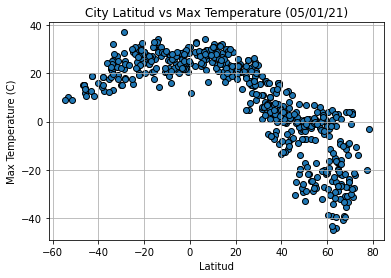

In [55]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitud vs Max Temperature (05/01/21)')
plt.grid()
plt.show()

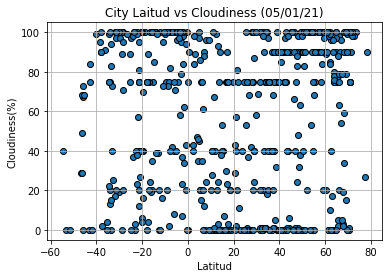

In [51]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title('City Laitud vs Cloudiness (05/01/21)')
plt.grid()
plt.show()

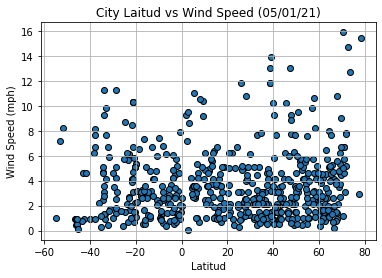

In [53]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed (mph)')
plt.title('City Laitud vs Wind Speed (05/01/21)')
plt.grid()
plt.show()

In [59]:
filt=(weather_df['Lat']>0)
North_Hemisphere_df=weather_df[filt]
North_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,-23.00,83,75,1.00,CA,1609837202
1,Jamestown,42.10,-79.24,-0.56,92,90,0.57,US,1609837340
2,Bethel,41.37,-73.41,0.00,97,90,1.52,US,1609837340
3,Butaritari,3.07,172.79,27.72,78,89,8.62,KI,1609837340
5,Narsaq,60.92,-46.05,-3.00,73,99,3.79,GL,1609837340
...,...,...,...,...,...,...,...,...,...
549,Nyurba,63.28,118.33,-31.63,84,96,3.45,RU,1609837415
550,Saint-Louis,16.33,-15.00,20.00,52,0,1.00,SN,1609837415
552,Haines Junction,60.75,-137.51,-16.35,89,100,0.79,CA,1609837415
553,Mingguang,32.78,117.96,2.76,79,98,4.45,CN,1609837416


The r-squared is: 0.7216104688980718


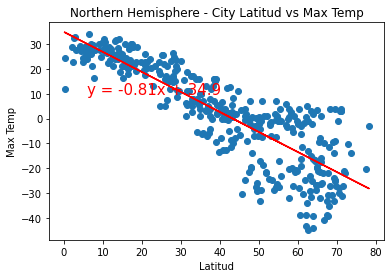

In [67]:
x_values = North_Hemisphere_df['Lat']
y_values = North_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - City Latitud vs Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [64]:
filt=(weather_df['Lat']<0)
South_Hemisphere_df=weather_df[filt]
South_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Punta Arenas,-53.15,-70.92,10.00,57,0,7.20,CL,1609837340
7,Ushuaia,-54.80,-68.30,9.00,61,40,1.00,AR,1609837262
11,Manyana,-23.40,21.72,29.61,38,100,5.67,BW,1609837341
15,Bambous Virieux,-20.34,57.76,29.00,66,40,5.10,MU,1609837341
16,Hermanus,-34.42,19.23,21.67,77,99,4.71,ZA,1609837341
...,...,...,...,...,...,...,...,...,...
532,Abancay,-13.63,-72.88,14.13,71,99,1.18,PE,1609837413
535,Bethanien,-26.50,17.16,23.57,54,99,1.57,NA,1609837413
538,Gamba,-2.65,10.00,27.96,75,7,3.44,GA,1609837414
539,Bushenyi,-0.59,30.21,25.29,50,0,2.08,UG,1609837414


The r-squared is: 0.3065409732348559


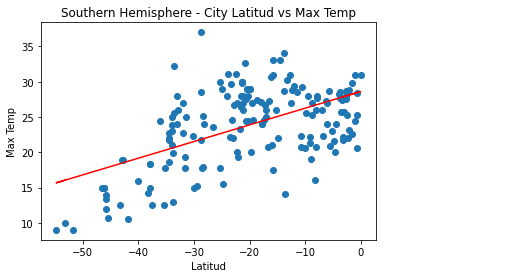

In [66]:
x_values = South_Hemisphere_df['Lat']
y_values = South_Hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - City Latitud vs Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()